# Backorder Prediction

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the Data for train and test.
data=pd.read_csv('Kaggle_Training_Dataset_v2.csv',low_memory=False)
data1=pd.read_csv('Kaggle_Test_Dataset_v2.csv',low_memory=False)

In [3]:
print("The training data shape =",data.shape ,". The test data shape =", data1.shape)

The training data shape = (1687861, 23) . The test data shape = (242076, 23)


In [4]:
# concating train and test data.
data=pd.concat([data,data1])
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [5]:
print("The final shape of the data is =",data.shape)

The final shape of the data is = (1929937, 23)


In [6]:
data.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [8]:
data.describe()

,count,mean,std,min,25%,50%,75%,max
national_inv,1929935.0,496.568259,29573.434344,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1814318.0,7.878627,7.054212,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1929935.0,43.064397,1295.420493,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1929935.0,178.539864,5108.770174,0.0,0.00,0.00,4.00,1510592.0
forecast_6_month,1929935.0,345.465893,9831.562085,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1929935.0,506.606748,14345.430866,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1929935.0,55.368164,1884.377009,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1929935.0,174.663858,5188.855851,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1929935.0,341.565349,9585.030376,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1929935.0,523.577094,14733.265629,0.0,0.00,4.00,47.00,3205172.0


In [9]:
data['went_on_backorder'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
data.groupby('went_on_backorder').count()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
went_on_backorder,,,,,,,,,,,,,,,,,,,,,
No,1915954,1915954,1800745,1915954,1915954,1915954,1915954,1915954,1915954,1915954,...,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954,1915954
Yes,13981,13981,13573,13981,13981,13981,13981,13981,13981,13981,...,13981,13981,13981,13981,13981,13981,13981,13981,13981,13981


Out of 1929937, only 13981 i.e., 0.5% of data is Out of Stock (Flag as Yes... as it went to BackOrder), and more than 99.5% is in Stock (Flag as No). So its result bias.

In [11]:
# checking now the nullvalues
percentage1 = data.isnull().sum()
percentage2 = data.isnull().sum()/data.isnull().count()*100
missing_values=pd.concat([percentage1,percentage2], axis=1,keys=['Total','%'])
missing_values

,Total,%
sku,0,0.000000
national_inv,2,0.000104
lead_time,115619,5.990817
in_transit_qty,2,0.000104
forecast_3_month,2,0.000104
forecast_6_month,2,0.000104
forecast_9_month,2,0.000104
sales_1_month,2,0.000104
sales_3_month,2,0.000104
sales_6_month,2,0.000104


# Data Cleaning

 1. need to clean missing values.
 2. need to drop sku column as it is random product id.
 3. Replacce all catagorical columns with 1 for yes and 0 for no.
 4. we need to scale the numerical columns.


In [12]:
data.drop(['sku'],axis=1,inplace=True)

In [13]:
data.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [14]:
categorical_columns = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk','stop_auto_buy', 'rev_stop', 'went_on_backorder']

for col in categorical_columns:
    data[col] = data[col].map({'No':0, 'Yes':1})

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929937 entries, 0 to 242075
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   national_inv       float64
 1   lead_time          float64
 2   in_transit_qty     float64
 3   forecast_3_month   float64
 4   forecast_6_month   float64
 5   forecast_9_month   float64
 6   sales_1_month      float64
 7   sales_3_month      float64
 8   sales_6_month      float64
 9   sales_9_month      float64
 10  min_bank           float64
 11  potential_issue    float64
 12  pieces_past_due    float64
 13  perf_6_month_avg   float64
 14  perf_12_month_avg  float64
 15  local_bo_qty       float64
 16  deck_risk          float64
 17  oe_constraint      float64
 18  ppap_risk          float64
 19  stop_auto_buy      float64
 20  rev_stop           float64
 21  went_on_backorder  float64
dtypes: float64(22)
memory usage: 338.7 MB


In [16]:
data.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [17]:
# filling all missing values.
data.national_inv = data.national_inv.fillna(data.national_inv.median())
data.lead_time = data.lead_time.fillna(data.lead_time.median())
data.in_transit_qty = data.in_transit_qty.fillna(data.in_transit_qty.median())
data.forecast_3_month = data.forecast_3_month.fillna(data.forecast_3_month.median())
data.forecast_6_month = data.forecast_6_month.fillna(data.forecast_6_month.median())
data.forecast_9_month = data.forecast_9_month.fillna(data.forecast_9_month.median())
data.sales_1_month = data.sales_1_month.fillna(data.sales_1_month.median())
data.sales_3_month = data.sales_3_month.fillna(data.sales_3_month.median())
data.sales_6_month = data.sales_6_month.fillna(data.sales_6_month.median())
data.sales_9_month = data.sales_9_month.fillna(data.sales_9_month.median())
data.potential_issue = data.potential_issue.fillna(data.potential_issue.median())
data.min_bank = data.min_bank.fillna(data.min_bank.median())
data.pieces_past_due = data.pieces_past_due.fillna(data.pieces_past_due.median())
data.perf_6_month_avg = data.perf_6_month_avg.fillna(data.perf_6_month_avg.median())
data.perf_12_month_avg = data.perf_12_month_avg.fillna(data.perf_12_month_avg.median())
data.local_bo_qty = data.local_bo_qty.fillna(data.local_bo_qty.median())
data.deck_risk = data.deck_risk.fillna(data.deck_risk.median())
data.oe_constraint = data.oe_constraint.fillna(data.oe_constraint.median())
data.ppap_risk = data.ppap_risk.fillna(data.ppap_risk.median())
data.stop_auto_buy = data.stop_auto_buy.fillna(data.stop_auto_buy.median())
data.rev_stop = data.rev_stop.fillna(data.rev_stop.median())
data.went_on_backorder = data.went_on_backorder.fillna(data.went_on_backorder.median())

In [18]:
percentage1 = data.isnull().sum()
percentage2 = data.isnull().sum()/data.isnull().count()*100
missing_values=pd.concat([percentage1,percentage2], axis=1,keys=['Total','%'])
missing_values

,Total,%
national_inv,0,0.0
lead_time,0,0.0
in_transit_qty,0,0.0
forecast_3_month,0,0.0
forecast_6_month,0,0.0
forecast_9_month,0,0.0
sales_1_month,0,0.0
sales_3_month,0,0.0
sales_6_month,0,0.0
sales_9_month,0,0.0


# Looking at correlations between features and the label

In [19]:
import matplotlib.pyplot as plt  
import seaborn as sns
data.corr().round(2)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
national_inv,1.00,0.00,0.10,0.08,0.08,0.08,0.16,0.19,0.22,0.24,...,0.03,-0.01,-0.01,0.01,-0.01,0.00,-0.00,-0.00,-0.00,-0.00
lead_time,0.00,1.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.00,-0.05,-0.05,-0.00,0.14,-0.00,0.01,-0.24,0.00,-0.02
in_transit_qty,0.10,-0.01,1.00,0.64,0.67,0.66,0.62,0.69,0.68,0.65,...,0.16,0.00,0.00,0.06,-0.02,0.00,-0.00,-0.00,0.00,-0.00
forecast_3_month,0.08,-0.01,0.64,1.00,0.99,0.97,0.69,0.76,0.82,0.81,...,0.36,0.01,0.01,0.04,-0.02,0.00,-0.00,0.00,0.00,-0.00
forecast_6_month,0.08,-0.01,0.67,0.99,1.00,0.99,0.71,0.80,0.86,0.85,...,0.37,0.01,0.01,0.04,-0.02,0.00,-0.00,0.00,-0.00,-0.00
forecast_9_month,0.08,-0.01,0.66,0.97,0.99,1.00,0.73,0.82,0.89,0.88,...,0.37,0.01,0.01,0.04,-0.02,0.00,-0.00,0.00,-0.00,-0.00
sales_1_month,0.16,-0.01,0.62,0.69,0.71,0.73,1.00,0.92,0.87,0.82,...,0.26,0.00,0.00,0.07,-0.01,0.00,-0.00,-0.00,-0.00,-0.00
sales_3_month,0.19,-0.01,0.69,0.76,0.80,0.82,0.92,1.00,0.98,0.93,...,0.31,0.00,0.00,0.07,-0.02,0.00,-0.00,-0.00,-0.00,-0.00
sales_6_month,0.22,-0.01,0.68,0.82,0.86,0.89,0.87,0.98,1.00,0.97,...,0.33,0.00,0.00,0.06,-0.02,0.00,-0.00,-0.00,-0.00,-0.00
sales_9_month,0.24,-0.01,0.65,0.81,0.85,0.88,0.82,0.93,0.97,1.00,...,0.33,0.00,0.00,0.05,-0.02,0.00,-0.00,-0.00,-0.00,-0.00


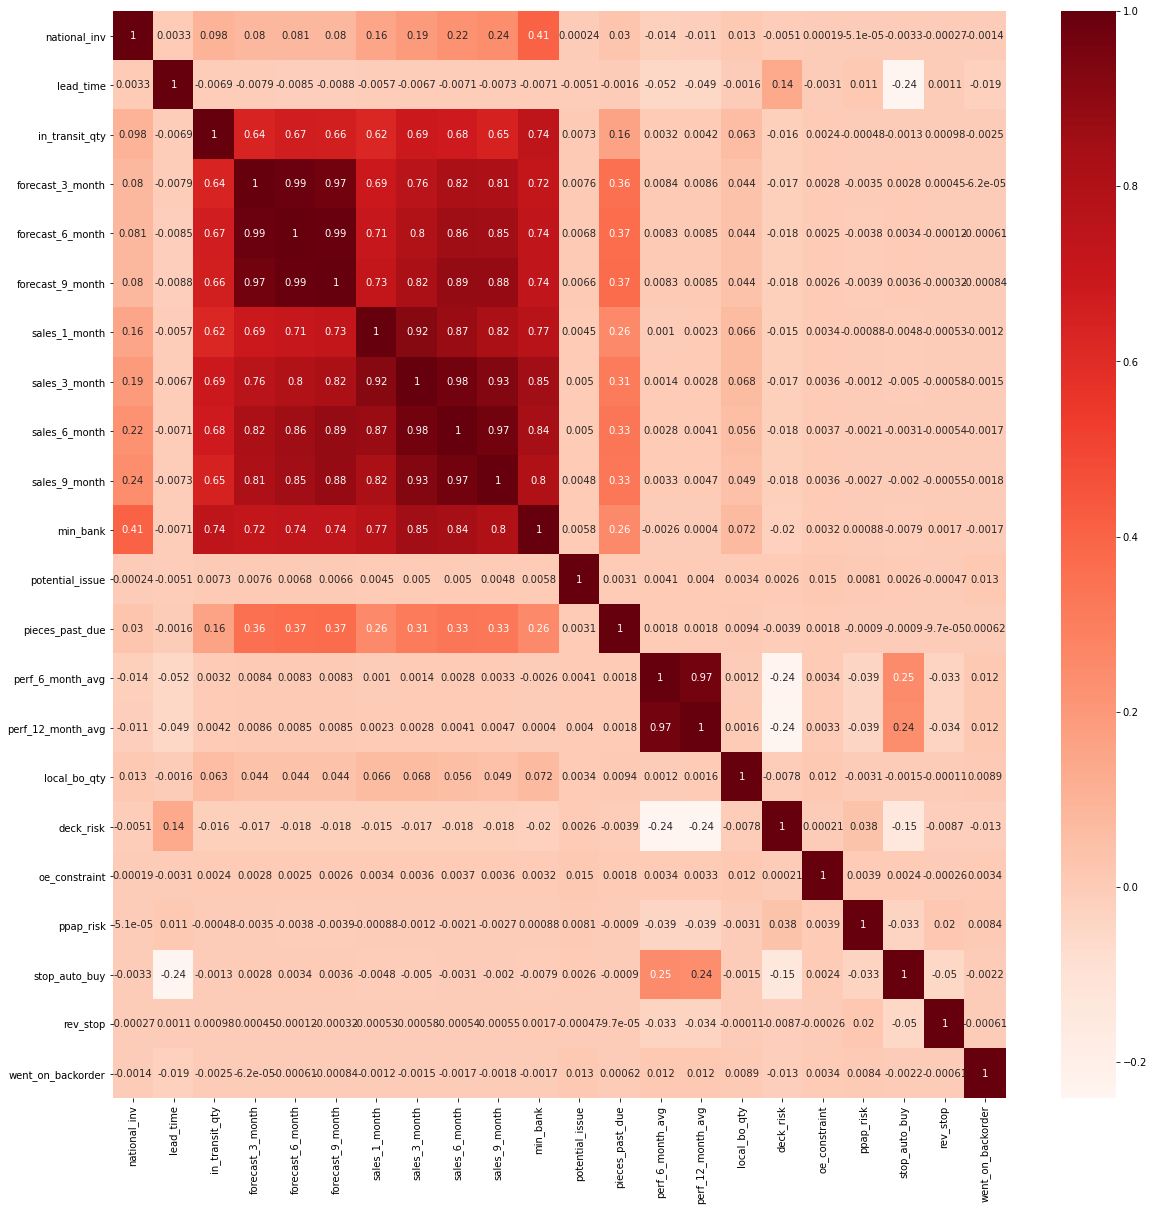

In [20]:
plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The correlation matrix shows that the in_transit_qty, forecast_3_month, forecast_6_month, forecast_9_month, sales_1_month, sales_3_month, sales_6_month, sales_9_month, and min_bank are highly correlated

In [21]:
# Dropping some features.
features = ['national_inv', 'lead_time', 'sales_1_month', 'pieces_past_due', 'perf_6_month_avg',
            'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']

In [22]:
X = data[features]
y = data['went_on_backorder']

In [23]:
display(X.shape, y.shape)

(1929937, 11)

(1929937,)

# Change scale of data

In [24]:
from sklearn.preprocessing import MinMaxScaler 

In [25]:
scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
X = pd.DataFrame(X, columns=features) 

In [26]:
X.head()

,national_inv,lead_time,sales_1_month,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,0.002205,0.153846,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,1.0,0.0
1,0.002205,0.173077,0.0,0.0,0.9999,0.0,0.0,0.0,0.0,1.0,0.0
2,0.002205,0.153846,0.0,0.0,0.0000,0.0,1.0,0.0,0.0,1.0,0.0
3,0.002205,0.153846,0.0,0.0,0.9910,0.0,0.0,0.0,0.0,1.0,0.0
4,0.002206,0.153846,0.0,0.0,0.0000,0.0,1.0,0.0,0.0,1.0,0.0


# Near Miss Undersampling

In [34]:
# define the undersampling method
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1, n_neighbors=3)

In [35]:
# transform the dataset
X, y = undersample.fit_resample(X, y)


In [36]:
X.head()

,national_inv,lead_time,sales_1_month,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,0.002205,0.153846,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,1.0,0.0
1,0.002205,0.173077,0.000000,0.0,0.9999,0.0,0.0,0.0,0.0,1.0,0.0
2,0.002205,0.153846,0.000001,0.0,0.0000,0.0,1.0,0.0,0.0,1.0,0.0
3,0.002205,0.153846,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,1.0,0.0
4,0.002205,0.153846,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
y.tail()

27957    1.0
27958    1.0
27959    1.0
27960    1.0
27961    1.0
Name: went_on_backorder, dtype: float64

# Splitting the Dataset

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_valid.shape, y_valid.shape)

(22369, 11) (22369,)
(5593, 11) (5593,)


# 1. RandomForstClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_valid)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [41]:
acc_random_forest

89.24

# 2. DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_dt = decision_tree.predict(X_valid)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [44]:
acc_decision_tree

89.94

# 3. LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_valid_pred_lr = logreg.predict(X_valid)
acc_LogisticRegression  = round(logreg.score(X_train, y_train) * 100, 2)

In [47]:
acc_LogisticRegression

60.91

In [48]:
modelling_score = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    'Score': [acc_LogisticRegression, acc_random_forest, acc_decision_tree]})

In [49]:
modelling_score

,Model,Score
0,Linear Regression,60.91
1,Random Forest,89.24
2,Decision Tree,89.94


Thanks

#  Doing Hyper parameter Tuning

In [50]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 25)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 179, 258, 337, 416, 495, 575, 654, 733, 812, 891, 970, 1050, 1129, 1208, 1287, 1366, 1445, 1525, 1604, 1683, 1762, 1841, 1920, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [51]:
rf = RandomForestClassifier()
# Random search of parameters, using 2 fold cross validation, 
# search across 50 different combinations.
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter =50, cv = 2, verbose=2, random_state=7, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_estimator_

Fitting 2 folds for each of 50 candidates, totalling 100 fits


RandomForestClassifier(bootstrap=False, max_depth=36, min_samples_split=5,
                       n_estimators=495)

In [72]:
rdf_clf = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                        max_depth=36, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=495,
                       n_jobs=None, oob_score=False, random_state=7,
                       verbose=3, warm_start=False)

rdf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 495
building tree 2 of 495
building tree 3 of 495
building tree 4 of 495
building tree 5 of 495
building tree 6 of 495
building tree 7 of 495
building tree 8 of 495
building tree 9 of 495
building tree 10 of 495
building tree 11 of 495
building tree 12 of 495
building tree 13 of 495
building tree 14 of 495
building tree 15 of 495
building tree 16 of 495
building tree 17 of 495
building tree 18 of 495
building tree 19 of 495
building tree 20 of 495
building tree 21 of 495
building tree 22 of 495
building tree 23 of 495
building tree 24 of 495
building tree 25 of 495
building tree 26 of 495
building tree 27 of 495
building tree 28 of 495
building tree 29 of 495
building tree 30 of 495
building tree 31 of 495
building tree 32 of 495
building tree 33 of 495
building tree 34 of 495
building tree 35 of 495
building tree 36 of 495
building tree 37 of 495
building tree 38 of 495
building tree 39 of 495
building tree 40 of 495
building tree 41 of 495
building tree 42 of 495
b

building tree 350 of 495
building tree 351 of 495
building tree 352 of 495
building tree 353 of 495
building tree 354 of 495
building tree 355 of 495
building tree 356 of 495
building tree 357 of 495
building tree 358 of 495
building tree 359 of 495
building tree 360 of 495
building tree 361 of 495
building tree 362 of 495
building tree 363 of 495
building tree 364 of 495
building tree 365 of 495
building tree 366 of 495
building tree 367 of 495
building tree 368 of 495
building tree 369 of 495
building tree 370 of 495
building tree 371 of 495
building tree 372 of 495
building tree 373 of 495
building tree 374 of 495
building tree 375 of 495
building tree 376 of 495
building tree 377 of 495
building tree 378 of 495
building tree 379 of 495
building tree 380 of 495
building tree 381 of 495
building tree 382 of 495
building tree 383 of 495
building tree 384 of 495
building tree 385 of 495
building tree 386 of 495
building tree 387 of 495
building tree 388 of 495
building tree 389 of 495


[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    6.3s finished


RandomForestClassifier(bootstrap=False, max_depth=36, max_features='sqrt',
                       max_samples=2, min_samples_split=5, n_estimators=495,
                       random_state=7, verbose=3)

In [73]:
Y_pred_rf=rdf_clf.predict(X_valid)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    0.3s finished


In [74]:
acc_random_forest = round(rdf_clf.score(X_train, y_train) * 100, 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    1.3s finished


In [75]:
print(acc_random_forest)

89.39


#  Checking For yes.

In [64]:
test=[[0.002206,1.000000,0.000065,0.0,0.0000,0.00008,1.0,0.0,1.0,0.0,0.0]]

In [65]:
answer=rdf_clf.predict(test)
print(answer)

[1.]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    0.0s finished


# Checking For NO

In [66]:
test1=[[0.002205,0.153846,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,1.0,0.0]]

In [67]:
answer=rdf_clf.predict(test1)
print(answer)

[0.]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    0.0s finished
